# Feed-forward Neural Network

In [1]:
!pip install tensorflow

You should consider upgrading via the '/Users/beni/Documents/Kennwerte/IdeaProjects/cas_machine_learning_cifar10/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, activations, Sequential, losses
from tensorflow.keras.regularizers import L2

from experiments.util import load_data

In [4]:
X_data, y_data = load_data()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

##### Preprocessing

In [6]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

###### Simple 0-1 scaling

In [7]:
X_train_std = tf.image.per_image_standardization(X_train).numpy()
X_val_std = tf.image.per_image_standardization(X_val).numpy()

2021-10-28 16:47:20.270565: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### NN (0 hidden layer -> Logistic Regression)

2021-10-28 16:48:17.590923: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
293/293 [==============================] - 4s 8ms/step - loss: 2.1519 - accuracy: 0.3184 - val_loss: 2.0118 - val_accuracy: 0.3674

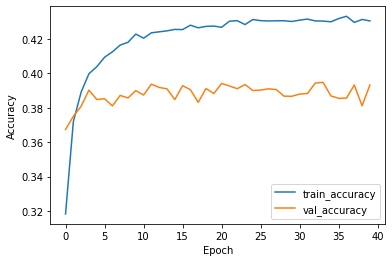

0.3932


In [9]:
model = Sequential([
    layers.InputLayer(input_shape=(32*32*3), name='input_layer'),
    layers.Dense(10, activation=activations.linear, kernel_regularizer=L2(), name='output_layer'),
])
model.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_std.reshape(-1, 32 * 32 * 3), y_train_enc, batch_size=128, epochs=40, validation_data=(X_val_std.reshape(-1, 32 * 32 * 3), y_val_enc))
plot_history(history)

y_val_hat_prob = model.predict(X_val_std.reshape(-1, 32 * 32 * 3))
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val_enc))

#### NN (1 hidden layer) no Regularization

Epoch 1/40
293/293 [==============================] - 5s 16ms/step - loss: 1.7984 - accuracy: 0.3661 - val_loss: 1.6448 - val_accuracy: 0.4218

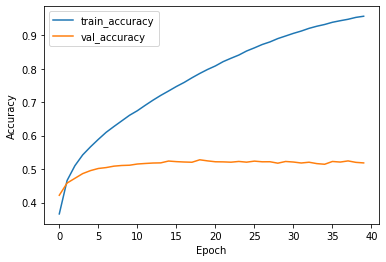

0.51848


In [10]:
model = Sequential([
    layers.InputLayer(input_shape=(32*32*3), name='input_layer'),
    layers.Dense(1024, activation=activations.relu, name='hidden_layer'),
    layers.Dense(10, activation=activations.linear, name='output_layer'),
])
model.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_std.reshape(-1, 32 * 32 * 3), y_train_enc, batch_size=128, epochs=40, validation_data=(X_val_std.reshape(-1, 32 * 32 * 3), y_val_enc))
plot_history(history)

y_val_hat_prob = model.predict(X_val_std.reshape(-1, 32 * 32 * 3))
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val_enc))

#### NN (1 hidden layer) with L2 Regularization

Epoch 1/40
293/293 [==============================] - 7s 22ms/step - loss: 16.4655 - accuracy: 0.3692 - val_loss: 15.4515 - val_accuracy: 0.4270

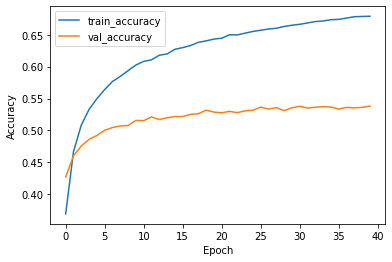

0.53808


In [11]:
model = Sequential([
    layers.InputLayer(input_shape=(32*32*3), name='input_layer'),
    layers.Dense(1024, activation=activations.relu, kernel_regularizer=L2(0.01), name='hidden_layer'),
    layers.Dense(10, activation=activations.linear, kernel_regularizer=L2(0.01), name='output_layer'),
])
model.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_std.reshape(-1, 32 * 32 * 3), y_train_enc, batch_size=128, epochs=40, validation_data=(X_val_std.reshape(-1, 32 * 32 * 3), y_val_enc))
plot_history(history)

y_val_hat_prob = model.predict(X_val_std.reshape(-1, 32 * 32 * 3))
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val_enc))